In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from collections import defaultdict

In [2]:
# import dataset
data = pd.read_csv("data/azure/VAS_user_ratings.csv")
data

,ACCOUNT_NUM.hash,package,ratings
0,0009e7e4d940c2a539b89342af07e7f1,AB Service Vacation,0.000000
1,008bca99f0cccb5d07d4f03744709cf8,Installment,0.000000
2,009ef2d25878cecee8d2c8115d26f4ab,Basic1 TeleLife,0.000909
3,009ef2d25878cecee8d2c8115d26f4ab,Basic2 TeleLife,0.002045
4,009ef2d25878cecee8d2c8115d26f4ab,Plus1 TeleLife,0.002525
...,...,...,...
1629,fe3bcb8c980fa7d05c7a7c62574ebe3e,E channeling Registration,0.000000
1630,fe48f49bbd4bdae38c0e533904700290,Basic1 TeleLife,0.000909
1631,ff6a9ebde4f19c42c852aa679c877b41,E channeling Registration,0.000000
1632,ffaa8955dcd8a0af7d148c10fd447fcc,Meet Lite,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  1634 non-null   object 
 1   package           1634 non-null   object 
 2   ratings           1634 non-null   float64
dtypes: float64(1), object(2)
memory usage: 38.4+ KB


## Interaction Matrix

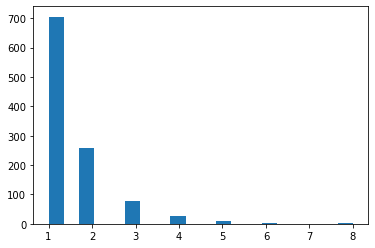

In [4]:
# create a histogram of all the interactions by all the users present in the dataset
interactions = data.groupby('ACCOUNT_NUM.hash').count()['package']
plt.hist(interactions,bins=20)
plt.show()

In [5]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="ACCOUNT_NUM.hash", columns="package", values="ratings",aggfunc=np.sum)

In [6]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0009e7e4d940c2a539b89342af07e7f1 to ffaa8955dcd8a0af7d148c10fd447fcc
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   AB Additional Distance                 2 non-null      float64
 1   AB Citylink Loyalty Rewards            5 non-null      float64
 2   AB Referral offer Discount             10 non-null     float64
 3   AB Rental Free                         3 non-null      float64
 4   AB Service Vacation                    25 non-null     float64
 5   Additional features Double VAS Bundle  1 non-null      float64
 6   BB Detailed Reports                    44 non-null     float64
 7   BB Entertainment Unlimited             18 non-null     float64
 8   BB Messenger Bundle                    18 non-null     float64
 9   BB PeoTVGO Revenue code                2 non-null      float64
 10  BB Report Subscrip

In [7]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [8]:
interactions_metrix.sample(n=10)

package,AB Additional Distance,AB Citylink Loyalty Rewards,AB Referral offer Discount,AB Rental Free,AB Service Vacation,Additional features Double VAS Bundle,BB Detailed Reports,BB Entertainment Unlimited,BB Messenger Bundle,BB PeoTVGO Revenue code,...,PeoTPackage Transfer,PeoTVGo Channel Package,Plus1 TeleLife,Plus4 TeleLife,Railway Registration,Referral offer Discount,Removal of Int & Parallel Ext,Sisu Connect,Telehealth,Video on Demand
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
bdc48f80b14487645959ffcc905ed293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1dbf9f5093d230ffb1fc22b00ea0bc93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
fccd08025608a774a70885c965aa0c10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
bfc81eddb3c8f5f4fb278089a24d3400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6e32d0a348d1ad246daa4104318d95b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1138b4f14a87a3cdd9d0e9cc6986f281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
125b839e826ef37a573afe8ab7f6efef,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002525,0.0
cc7d16b0e029443d0fadd6c2b903b546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002525,0.0
1ff2bd293b3cdb076dc841f4344a7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002525,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [9]:
reader = Reader(rating_scale=(0, 1))
data_model = Dataset.load_from_df(data, reader)

In [10]:
trainset, testset = train_test_split(data_model, test_size=.20)

## Collabarative Recoomenders with Surprise

In [11]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [12]:
def get_top_n(predictions, n=10):


    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:5]
        

    return top_n

### SVD recommender

In [13]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
svd_validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0431  0.0519  0.0576  0.0641  0.0487  0.0531  0.0072  
MAE (testset)     0.0196  0.0189  0.0225  0.0243  0.0221  0.0215  0.0020  
Fit time          0.13    0.10    0.11    0.09    0.09    0.10    0.01    
Test time         0.01    0.00    0.00    0.00    0.00    0.00    0.00    


In [14]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [15]:
top_n = get_top_n(predictions, n=10)
#print(top_n)
users_est = defaultdict(list)
users_true=defaultdict(list)
rec_for_user=defaultdict(list)
for uid, user_ratings in top_n.items():
    users_est[uid].append([est for (_, est,_) in user_ratings])
    users_true[uid].append([true_r for (_,_,true_r) in user_ratings])
    rec_for_user[uid].append([iid for (iid,_,_) in user_ratings])

In [16]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [17]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
161,f899283864105a84dddb4da423d21a14,Hotline Time Delayed,0.0,0.0,{'was_impossible': False},1,34,0.0
290,2b2257ee9dc43a0c625c1a8268bc8799,Referral offer Discount,0.0,0.0,{'was_impossible': False},1,6,0.0
30,895a491a6f5a60d057b537bc41ce9e27,PeoTPackage Transfer,0.0,0.0,{'was_impossible': False},1,4,0.0
78,9e19da5eef4cce597645ed6914fe72f3,Meet Lite,0.0,0.0,{'was_impossible': False},1,290,0.0
32,a1f9309b10ae0a4a415814df59804e83,AB Referral offer Discount,0.0,0.0,{'was_impossible': False},1,6,0.0
77,9c802b6b329dc1e3ba6e6c655a21e65d,Referral offer Discount,0.0,0.0,{'was_impossible': False},1,6,0.0
34,c310c8a2a64c63c047e5c05c546aa57d,BB Detailed Reports,0.0,0.0,{'was_impossible': False},2,33,0.0
76,38b2614973f3729c7c0afcf96f3e6657,BB Detailed Reports,0.0,0.0,{'was_impossible': False},3,33,0.0
239,55619415b9de28ef8af1650300da5a1c,Hotline Time Delayed,0.0,0.0,{'was_impossible': False},2,34,0.0
198,1186aaba03e18b3dda89c75d611e8116,AB Service Vacation,0.0,0.0,{'was_impossible': False},1,20,0.0


In [18]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.0374
RMSE --> 0.03744203302847152
Accuracy --> 0.9625579669715285


### SlopeOne recommender

In [19]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
so_validate =cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0802  0.0293  0.0793  0.0552  0.0783  0.0644  0.0199  
MAE (testset)     0.0143  0.0091  0.0141  0.0081  0.0121  0.0115  0.0025  
Fit time          0.02    0.02    0.02    0.01    0.02    0.02    0.01    
Test time         0.01    0.01    0.00    0.00    0.00    0.01    0.00    


In [20]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

<ipython-input-20-c41232ee9814>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  algo.fit(trainset)


In [21]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [22]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
192,92563db780f368512dc2eb7aeb2b3787,Meet Lite,0.000000,0.000000,{'was_impossible': False},1,290,0.0
77,9c802b6b329dc1e3ba6e6c655a21e65d,Referral offer Discount,0.000000,0.000000,{'was_impossible': False},1,6,0.0
38,d9327013392b715deae9b76c15957238,Plus1 TeleLife,0.002525,0.002525,{'was_impossible': False},1,132,0.0
256,4b70933dddeb07ffb4b52ed8a790f911,Hotline Immediate,0.000000,0.000000,{'was_impossible': False},1,16,0.0
254,3b441927a91a30b7daccc836acbfb12f,Hotline Immediate,0.000000,0.000000,{'was_impossible': False},2,16,0.0
41,3e3066c57fdadc381bb9e0e603b5b411,Hotline Time Delayed,0.000000,0.000000,{'was_impossible': False},1,34,0.0
82,01cbc9b050fa000d1de651103cd30fc3,Meet Lite,0.000000,0.000000,{'was_impossible': False},1,290,0.0
134,02059e815d999bda708149ae263946d3,Meet Lite,0.000000,0.000000,{'was_impossible': False},6,290,0.0
155,9390b2db55d18b6dca928bc8d11f84fb,Plus1 TeleLife,0.002525,0.002525,{'was_impossible': False},1,132,0.0
194,4c7a4769273c7a2eb4860a09f6376a70,Meet Lite,0.000000,0.000000,{'was_impossible': False},1,290,0.0


In [23]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.0293
RMSE --> 0.029268161756504284
Accuracy --> 0.9707318382434957


### KNN with Means recommender

In [24]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
knn_validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0875  0.0679  0.1009  0.0775  0.0631  0.0794  0.0137  
MAE (testset)     0.0211  0.0141  0.0224  0.0173  0.0127  0.0175  0.0038  
Fit time          0.06    0.06    0.08    0.07    0.06    0.07    0.01    
Test time         0.04    0.02    0.02    0.05    0.02    0.03    0.01    


In [25]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [26]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [27]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
287,019217a7950072f267ab6dcb0d790969,E channeling Registration,0.0,0.0,"{'actual_k': 10, 'was_impossible': False}",1,67,0.0
77,9c802b6b329dc1e3ba6e6c655a21e65d,Referral offer Discount,0.0,0.0,"{'actual_k': 2, 'was_impossible': False}",1,6,0.0
76,38b2614973f3729c7c0afcf96f3e6657,BB Detailed Reports,0.0,0.0,"{'actual_k': 28, 'was_impossible': False}",3,33,0.0
286,e3de179c0b9eb637a8bacda1025fd673,Hotline Immediate,0.0,0.0,"{'actual_k': 12, 'was_impossible': False}",1,16,0.0
185,827760640889bb2da8a01617903bfdeb,BB Detailed Reports,0.0,0.0,"{'actual_k': 23, 'was_impossible': False}",1,33,0.0
67,0f423fa34f0ba5129051b8141d18c754,Meet Max,0.0,0.0,"{'actual_k': 30, 'was_impossible': False}",1,53,0.0
65,95ac85c80ab64e565eaeb12a71855f06,Meet Max,0.0,0.0,"{'actual_k': 32, 'was_impossible': False}",2,53,0.0
290,2b2257ee9dc43a0c625c1a8268bc8799,Referral offer Discount,0.0,0.0,"{'actual_k': 4, 'was_impossible': False}",1,6,0.0
59,708ec595df8a31e818ec6b58bbb7ace8,E channeling Registration,0.0,0.0,"{'actual_k': 0, 'was_impossible': False}",2,67,0.0
58,81cf6ed160d05bf34082bc2b265ddc02,Meet Lite,0.0,0.0,"{'actual_k': 30, 'was_impossible': False}",1,290,0.0


In [28]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.0536
RMSE --> 0.053620379536895156
Accuracy --> 0.9463796204631049


### Benchmark algorithms

In [29]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
val_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
val_df

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usin

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.026989,0.047800,0.029805
BaselineOnly,0.044729,0.004784,0.001889
SVD,0.054352,0.110396,0.002202
SlopeOne,0.056823,0.016001,0.003801
KNNWithMeans,0.073843,0.072828,0.048689
CoClustering,0.076922,0.149081,0.001400


## CF Recommenders Accuracy Plots

In [30]:
svd_validate["test_rmse"]

array([0.04314047, 0.05186528, 0.05757068, 0.06407189, 0.04866225])

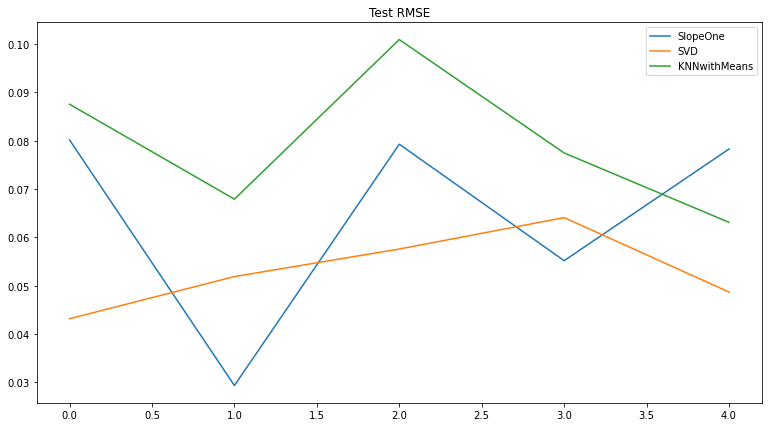

In [31]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_rmse"])
ax.plot(svd_validate["test_rmse"])
ax.plot(knn_validate["test_rmse"])
# plt.xticks(np.arange(0, 30, 0.5))
plt.title("Test RMSE", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans"])

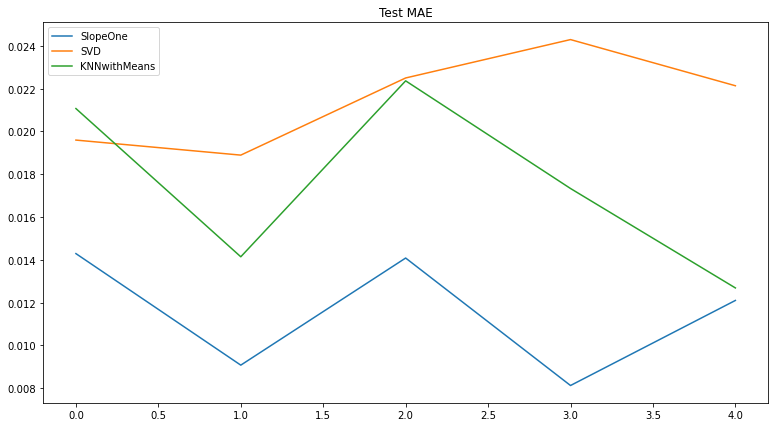

In [32]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_mae"], linestyle='dashdot', color='blue')
ax.plot(svd_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot(knn_validate["test_mae"], linestyle='dashdot', color='blue')
# plt.xticks(np.arange(0, 4, 0.2))
plt.title("Test MAE", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans"])